In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [15]:
X = pd.read_csv('ml-intro/subset/X_wine.csv', index_col=0)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


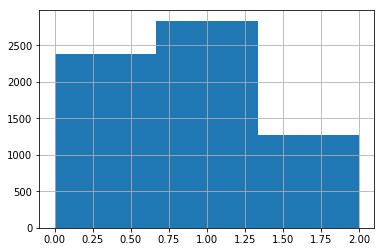

In [38]:
y = pd.read_csv('ml-intro/subset/y_wine.csv', header=None, squeeze=True,index_col=0)
y.hist(bins=3)

In [52]:
X.shape

(6497, 11)

In [24]:
X_train = X.loc[:5196,:]
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [25]:
X_train.shape

(5197, 11)

In [53]:
X_test = X.loc[5197:]
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
5197,5.8,0.200,0.24,1.4,0.033,65.0,169.0,0.99043,3.59,0.56,12.3
5198,6.6,0.390,0.38,9.7,0.053,49.0,226.0,0.99787,3.30,0.57,9.4
5199,6.8,0.120,0.30,12.9,0.049,32.0,88.0,0.99654,3.20,0.35,9.9
5200,6.6,0.295,0.24,1.6,0.039,29.0,140.0,0.99304,3.35,0.61,10.4
5201,6.6,0.260,0.24,7.2,0.038,28.0,137.0,0.99520,3.35,0.60,10.4


In [48]:
X_test.shape

(1300, 11)

In [54]:
X_test.reset_index(drop=True, inplace=True)
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.8,0.200,0.24,1.4,0.033,65.0,169.0,0.99043,3.59,0.56,12.3
1,6.6,0.390,0.38,9.7,0.053,49.0,226.0,0.99787,3.30,0.57,9.4
2,6.8,0.120,0.30,12.9,0.049,32.0,88.0,0.99654,3.20,0.35,9.9
3,6.6,0.295,0.24,1.6,0.039,29.0,140.0,0.99304,3.35,0.61,10.4
4,6.6,0.260,0.24,7.2,0.038,28.0,137.0,0.99520,3.35,0.60,10.4


In [39]:
y.shape

(6497,)

In [40]:
y_train = y.loc[:5196]
y_train.shape

(5197,)

In [41]:
y_train.head()

0
0    0
1    0
2    0
3    1
4    0
Name: 1, dtype: int64

In [42]:
y_test = y.loc[5197:]
y_test.shape

(1300,)

In [33]:
y_train = y_train['0.1']
y_train.shape

(5196,)

In [43]:
y_train.head()

0
0    0
1    0
2    0
3    1
4    0
Name: 1, dtype: int64

In [56]:
y_test.reset_index(drop=True, inplace=True)

In [44]:
y_test.shape

(1300,)

In [57]:
X_train.to_csv('ml-intro/subset/X_winetrain.csv')
X_test.to_csv('ml-intro/subset/X_winetest.csv')
y_train.to_csv('ml-intro/subset/y_winetrain.csv')
y_test.to_csv('ml-intro/subset/y_winetest.csv')